## cloudFPGA Studio
### Case study: Harris Corner Detector (Computer Vision) - NumpPy version with camera loop
### You don't need FPGA knowledge, just basic Python syntax !!!

Note: Assuming that the FPGA is already flashed

Configure the Python path to look for FPGA aceleration library

In [1]:
import time
import sys
import os
from IPython.display import Image
from IPython.display import display
from IPython.display import clear_output

# for software execution
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
trieres_lib=os.environ['cFpRootDir'] + "HOST/vision/harris/languages/python/build"
sys.path.append(trieres_lib)

Import the FPGA accelerator library

In [3]:
import _trieres_harris_numpi

Assign the IP of the FPGA that is already loaded with Harris image

In [4]:
# Give image dimensions (the ones that the FPGA bitstream is configured with!) 
height = width = 256

#fpga_ip=os.environ['FPGA_IP']
fpga_ip="10.12.200.203"
fpga_port="2718"
print(fpga_ip+"@"+fpga_port)

10.12.200.203@2718


In [5]:
def cornerHarris_hw(image):

    # Flattening the image from 2D to 1D
    image = image.flatten()

    # Detecting corners
    start_fpga = time.time()
    dst1d = _trieres_harris_numpi.harris(image, height*width, fpga_ip, fpga_port)
    elapsed_fpga =  time.time() - start_fpga
    # Convert 1D array to a 2D numpy array of 2 rows and 3 columns
    dst = np.reshape(dst1d, (height, width))
    return dst

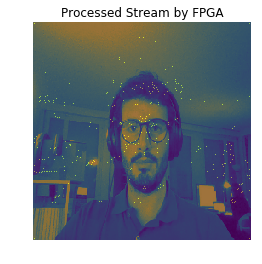

In [ ]:
# Grab the input device, in this case the webcam
# You can also give path to the video file
vid = cv.VideoCapture(0)

# Put the code in try-except statements
# Catch the keyboard exception and 
# release the camera device and 
# continue with the rest of code.
try:
    while(True):
        # Capture frame-by-frame
        ret, frame = vid.read()
        if not ret:
            # Release the Video Device if ret is false
            vid.release()
            # Message to be displayed after releasing the device
            print("Released Video Resource")
            break
        # Convert the image from OpenCV BGR format to matplotlib RGB format
        # to display the image
        frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        # Converting to grayscale
        frame = cv.cvtColor(frame, cv.COLOR_RGB2GRAY)
        # Adjusting the image file if needed
        if ((frame.shape[0] != height) or (frame.shape[1] != width)):
            #print("Warning: The image was resized from [", frame.shape[0] , " x ", frame.shape[1] , "] to [", height  , " x ", width, "]")
            dim = (width, height) 
            frame = cv.resize(frame, dim, interpolation = cv.INTER_LINEAR) 
        # Call the FPGA harris accelerator as a Python function
        framerx = cornerHarris_hw(frame)
        # Turn off the axis
        plt.axis('off')
        # Title of the window
        plt.title("Processed Stream by FPGA")
        # Display the frame
        plt.imshow(framerx)
        plt.imshow(frame, alpha=0.5)
        plt.show()
        # Display the frame until new frame is available
        clear_output(wait=True)
except KeyboardInterrupt:
    # Release the Video Device
    vid.release()
    # Message to be displayed after releasing the device
    print("Released Video Resource")